<div style="padding:30px; color: white; background-color: #0071CD">
<center>
<img src="img/logoub.jpeg">
<center>
<p>
<h1>Algorítmica Avanzada</h1>
<h2>Problemas 2 - Greedy </h2>
</center>
</p>
</div>

<div style="width:90%; margin:0 auto;">
  <h2><p>Minimum Spanning Tree</p></h2>
  <p>
Dado un grafo conexo y no dirigido, un spanning tree de ese grafo es un subgrafo que tiene que ser un árbol (sin ciclos) y contener todos los vértices del grafo inicial. Cada arista tiene asignado un peso, que es un número representativo de algún objeto, distancia, etc. y se usa para asignar un peso total al MST computando la suma de todos los pesos de las aristas del árbol en cuestión. Un MST o minimum spanning tree es un árbol recubridor que pesa menos o igual que caulquier otro árbol recubridor de ese grafo. Todo grafo tiene un bosque recubridor mínimo.
  </p>
<img width="300px" src="img/mst.png">
  </div>



<div class="alert alert-success" style="width:90%; margin:0 auto;">
  <h2><p>1- Kruskal Algorithm</p></h2>
  El algoritmo de Kruskal es un algoritmo voraz que calcula el MST de un grafo dado. Se basa en ir añadiendo a cada paso la arista más pequeña del grafo que conecte dos subárboles que no estaban previamente conectados.
    
   <center><img width="250px" src="./img/KruskalDemo.gif"></center>

<p>
En este apartado tendréis que implementar el algoritmo de Kruskal para obtener el Minimum Spanning Tree de cualquier grafo no dirigido. 
  </p>


In [1]:
# Imports
import networkx as nx

In [1]:
def find(Parents,i):
    if Parents[i]==i:
        return i
    return find(Parents,Parents[i])

def kruskal(G):
        """ Implementación del algoritmo de Kruskal para obtener el MST de un grafo cualquiera.
        Args:
            G (nx.Graph): El grafo de tipo nx.Graph sobre el que queremos obtener el MST. 
                          Las aristas tienen el atributo 'weight' que indica su peso.
        Returns:
            tree (nx.Graph): El grafo de tipo nx.Graph que contiene el arbol de expansión mínima.
            weight (float/int): El peso total del grafo tree.
        """
        tree = nx.Graph()
        total_weight = 0
        i = 0 #Index we are going to use to iterate in while
        
        Parents = [x for x in G.nodes] #ListComprehension to save the parents of the nodes the position indicates what node is
        Aristas = sorted(G.edges(data=True),key = lambda E: E[2]['weight'])#Sorting with the data weight
        
        while len(tree.edges)+1 != len(G.nodes): #When the number of E in tree -1 is going to the V of G is finished
            distancia = Aristas[i][2]['weight'] #Doing a vairable with the weight making it simple to read
            indiceA = find(Parents,Aristas[i][0]) #Searching the parent of first V
            indiceB = find(Parents,Aristas[i][1]) #Searching the parents of the second V
            if(indiceA != indiceB): #If te indexs are different that means the parents are diferents and they aren't conected
                total_weight += distancia #Increasing the total_weight
                tree.add_edge(Aristas[i][0],Aristas[i][1])
                Parents[indiceB] = Parents[indiceA]#We are going to declare the parent of B is A now
            i += 1 #Increasing for the next iteration

        return tree, total_weight


<div class="alert alert-success" style="width:90%; margin:0 auto;">
  <h2><p>2- Prim Algorithm</p></h2>
  Igual que Kruskal, el algoritmo de Prim es un algoritmo voraz que calcula el MST de un grafo dado. La diferencia fundamental es en el orden en que se añaden aristas. Prim empieza en un nodo concreto y se basa en ir añadiendo a cada paso la arista más pequeña de entre las que conectan los nodos ya pertenecientes al árbol con sus vecinos.
    
   <center><img width="250px" src="./img/PrimDemo.gif"></center>

<p>
En este apartado tendréis que implementar el algoritmo de Prim para obtener el Minimum Spanning Tree de cualquier grafo no dirigido y conexo. 
  </p>


In [2]:
import heapq
from random import choice
def prim(G,origen=None,infinity=float('inf')):
    """ Implementación del algoritmo de Kruskal para obtener el MST de un grafo cualquiera.
    Args:
        G (nx.Graph): El grafo sobre el que queremos obtener el MST. 
                      Las aristas tienen el atributo 'weight' que indica su peso.
        origin (node_id): Opcional, nodo por el cual comenzar la búsqueda.
        infinity (float): Opcional, valor para inicializar las distancias.
    Returns:
        tree (nx.Graph): El grafo que contiene el arbol de expansión mínima.
        weight (float/int): El peso total del grafo tree.
    """
    tree = nx.Graph()
    heap = []
    total_weight = 0
    
    if not origen:#If we havn't introduced an origin we are going to choose it random.
        origen = choice(list(G.nodes()))
    heapq.heapify(heap)
    heapq.heappush(heap,(0,origen,-1))#Pushing the first element in the heap
    
    while heap : #Until the heap is ended
        valor, nodo, padre = heapq.heappop(heap) #Removing and saving the smallest edge 
        if(nodo != origen):#The first iteration doesn't have another V connected or weight to add
            if(nodo not in tree.nodes()):#If is not already in the MST we are going to add it
                tree.add_edge(nodo,padre) #Adding the smallest edge searched in the nieghbours
                total_weight += valor #Adding the weight saved in the heap
        if(len(tree.nodes())==len(G.nodes())):#If we ended to full tree wwith the same number of V in G is already finish
            break
        for neighbor in G.neighbors(nodo):#Iterating around the neighbours
            weight = G.edges[neighbor,nodo]['weight'] #Variable to give a better understanding of the algorithm
            if(neighbor not in tree.nodes()):#If isn't already in tree we are going to add in the heap
                heapq.heappush(heap,(weight,neighbor,nodo)) #we add in the heap and isn't the weight infinity
    
    return tree, total_weight

<div class="alert alert-danger" style="width:80%; margin:0 auto; padding">
<center><p><h3> Tests </h3></p> </center>
<p>
Realiza los tests pertinentes en las celdas dispuestas a continuación.
</p>
</div>


C:\Users\oriol\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


TOTAL MST WEIGHT
NX MST  24
Kruskal 24
Prim    24


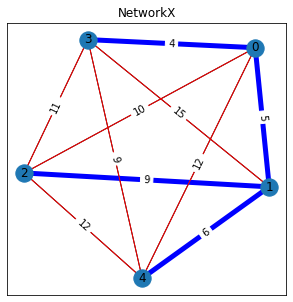

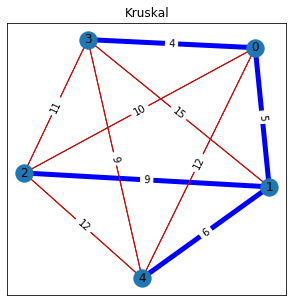

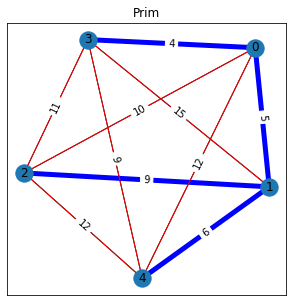

In [3]:
%matplotlib inline
from utils import *

# Create random Graph
num_v = 5 # Num nodes
num_e = 15 # Num edges
G = generate_random_graph(num_v,num_e)


# Run test
test_algs(G,kruskal,prim,0) # 0 for both, 1 for kruskal only, 2 for prim only

<div class="alert alert-warning">
<h1>Pregunta 1</h1>
<p><strong>
Explica las diferencias entre los algoritmos de Kruskal y Prim. ¿Para qué casos (características concretas de un grafo) es uno más eficiente que el otro?
</strong></p>
</div>

Las diferencias entre Kruskal y Prim estan en que uno se ejecuta por aristas y otro por vertices, por esta razon en el caso de Kruskal serà màs eficiente cuando hayan más nodos pero menos aristas: ya que este recorre mediante el peso de las aristas ordenadas ; y en caso de Prim cuando hayan más aristas que nodos, ya que recorrera por nodos mediante el vecino con menor peso. En parte esto también se puede extraer por la complejidad de cada uno de los algoritmos.

<div class="alert alert-warning">
<h1>Pregunta 2</h1>
<p><strong>
Explica tu implementación y analiza la complejidad de ambos algoritmos.
</strong></p>
</div>

La implementación de Kruskal primeramente tuve la idea de buscar por indices através de una lista que los almacenava pero debido a que no me funcionava pase a hacer una busca por indices como se ve abajo del cuadro de la entrega, y volvi a pensar en hacer una lista donde guardar la posicion de los conjuntos y se me ocurrio la idea que esta plasmada através de una funcion recursiva que nos inidicara si el padre no sera el mismo, entonces no pertenencen al mismo conjunto. La complejidad de este algoritmo Kruskal es ElogE, pricipalemnte por el sort de la lista de edges, realizado ya que no habra que hacer modificaciones en la lista ya que estaran todas las aristas y ordenador por peso.

En cuanto a la implementación de Prim me he basado bastante en la practica de Dijkstra ya que en terminos de concepto a la hora de implementar són muy parecidos, ambos buscan el nodo con el que llegar en menor distancia; la principal diferencia reside en que dijkstra tiene que ir actualizando la distancia mientras que Prim simplemente guarda el peso de la propia arista, para poder realizar un MST. La complejidad de el Algoritmo Prim es VlogV, ya que hace un heap que va recorriendo solamente los nodos en uno a uno con la arista minima de peso, a comentar que en este caso la estructura usada es un heap debido a que si se hace un sort como en el primer algoritmo no tendria sentido ya que hay que ir añadiendo a cada iteracion, haciendo el coste menor que es log n. 

<div class="alert alert-info">
<center>
  <h1>Entrega</h1>
</center>
<p>
La entrega de esta práctica se podrá realizar en el campus virtual hasta el día <b>17 de Noviembre a las 23:55</b>. En la tarea que se habilitará en el campus deberéis colgar <b>únicamente este notebook</b> con el nombre:
</p>
<p>
```
[grupo]_[apellido]_[nombre]_2-Greedy.ipynb
```

</p>
<p>
    Por ejemplo, para un alumno llamado <i>Nombre Genérico</i> perteneciente al <i>grupo Z</i> el nombre del archivo debería ser:
</p>
<p>
```
Z_Generico_Nombre_2-Greedy.ipynb
```

Y <b>NO</b>:
<ul>
<li>Z00_Generico_Nombre_2-Greedy.zip</li>
    
<li>ZX_Generico_Nombre_2-Greedy.ipynb</li>

<li>Lab2_Generico_Nombre_2-Greedy.rar</li>

<li>2-Greedy.ipynb</li>
<li> ... literalmente cualquier otra cosa que no sea el nombre que sí hay que ponerle </li>
</ul>
</p>
<p>

Es muy importante que en el notebook exista <b> una sola función </b> con el nombre <i>kruskal</i> y <i>prim</i> ya que emplearemos un corrector automático para agilizar el proceso. Podéis tener tantas funciones auxiliares como queráis, pero no puede haber dos funciones con el mismo nombre. No os preocupéis si no os funciona del todo, el no pasar los tests no significa necesariamente que tengáis un 0 en la práctica; también revisaremos manualmente el código así como los comentarios del final del notebook y vuestro análisis de complejidad.


Es fundamental que el código esté bién comentado y con un análisis de complejidad exhaustivo del algoritmo. La importancia de poner nombre correcto al archivo debería ser directamente proporcional a lo contentos que queráis que los profesores de prácticas corrijan.<b> No adherirse al formato en el nombre del archivo así como entregar otro tipo de archivo o varios archivos, conllevará a la no corrección de vuestra práctica.</b>
</p>
</div>

''''python

    #VERSIONS ANTERIORS DE KRUSKAL
    import heapq
    def kruskal(G):
        """ Implementación del algoritmo de Kruskal para obtener el MST de un grafo cualquiera.
        Args:
            G (nx.Graph): El grafo de tipo nx.Graph sobre el que queremos obtener el MST. 
                          Las aristas tienen el atributo 'weight' que indica su peso.
        Returns:
            tree (nx.Graph): El grafo de tipo nx.Graph que contiene el arbol de expansión mínima.
            weight (float/int): El peso total del grafo tree.
        """
        tree = nx.Graph()
        total_weight = 0
        heap = []
        heapq.heapify(heap)
        indiceNodoA = 0
        indicieNodoB = 0
        Conjuntos = []
        for i in G.nodes():
            Conjuntos.append({i})
        for pesos in G.edges():
            heapq.heappush(heap,(G.edges[pesos[0],pesos[1]]['weight'],pesos))
        while heap or len(Conjuntos)!=1:
            distancia = heapq.heappop(heap)
            Encontrado = 0
            for i in Conjuntos:
                if(distancia[1][0] in i):
                    indiceNodoA = Conjuntos.index(i)
                    Encontrado += 1
                if(distancia [1][1] in i):
                    indiceNodoB = Conjuntos.index(i)
                    Encontrado += 1
                if(Encontrado == 2):
                    break
            if(indiceNodoA != indiceNodoB):
                total_weight += distancia[0]
                tree.add_edge(distancia[1][0],distancia[1][1])
                Conjuntos[indiceNodoA] = Conjuntos[indiceNodoA] | Conjuntos[indiceNodoB]
                Conjuntos.pop(indiceNodoB)
            if(len(Conjuntos)==1):
                    break

        return tree, total_weight
'''